## Backpropagation Algorithm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X= np.loadtxt('Files/ex3data1.txt')
y= np.loadtxt('Files/ex3datay.txt')
print('X',X.shape)
print('y',y.shape)

X (5000, 400)
y (5000,)


In [3]:
yy= pd.Series(y)
yy= pd.get_dummies(yy)
print("yy",yy.shape)

yy (5000, 10)


In [4]:
theta1= np.loadtxt('Files/ex3weights.txt')
theta2= np.loadtxt('Files/ex3weights2.txt')
theta= np.array([theta1, theta2])
print('Theta1',theta1.shape)
print('Theta2',theta2.shape)

Theta1 (25, 401)
Theta2 (10, 26)


In [5]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z));

### Sigmoid gradient

In [6]:
def sigmoid_grad(z):
    return sigmoid(z)* (1- sigmoid(z))

### Initializing Theta randomly

In [7]:
def init_random():
    lim= 0.12
    theta1= np.random.uniform(-lim, lim, size= (25, 401))
    theta2= np.random.uniform(-lim, lim, size= (10, 26))
    return theta1, theta2

### Forword Propagation

In [8]:
def hypa(theta1, theta2):
    XX= X.transpose()
    a1= np.insert(XX, 0, 1, axis=0)
    
    z2= np.dot(theta1, a1)
    a2= sigmoid(z2)
    
    a2= np.insert(a2, 0, 1, axis=0)
    z3= np.dot(theta2, a2)
    a3= sigmoid(z3)
    
    return a3

print('hyp',(hypa(theta1, theta2)).shape)

hyp (10, 5000)


### Making theta compatible for opt func

In [9]:
def encode(theta1, theta2):
    th1= theta1.flatten()
    th2= theta2.flatten()
    th= np.concatenate((th1, th2), axis= 0)
    return th
    
#encode(theta1, theta2)

In [10]:
def decode(theta):
    th1= theta[:25*401]
    th2= theta[25*401:]
    theta1= th1.reshape((25, 401))
    theta2= th2.reshape((10, 26))
    return theta1, theta2
    
#decode(encode(theta1, theta2))

### Cost Function

In [11]:
def cost(theta):
    theta1, theta2= decode(theta)
    m= X.shape[0]
    h= hypa(theta1, theta2)
    t1= yy.transpose() * np.log(h)
    t2= (1- yy.transpose()) * np.log(1- h)
    t= t1+ t2
    t= t.sum().sum() * -1
    c= t/float(m)
    print('Now the cost is {}'.format(c))
    return c
    
    th1= theta1[:,1:]**2
    th2= theta2[:,1:]**2
    th= th1.sum().sum() + th2.sum().sum()
    lembda= 1.0
    regu= lembda * th / (2 * m)
    
    c= c + regu
    print("Now the cost is {}".format(c))
    return c
    

tr1, tr2= init_random()
cost(encode(theta1, theta2))

Now the cost is 0.2876291651613189


0.2876291651613189

### Gradient computation

In [32]:
def gradient(theta):
    theta1, theta2= decode(theta)
    XX= X.transpose()
    a1= np.insert(XX, 0, 1, axis=0)
    #print('a1',a1.shape)
    
    z2= np.dot(theta1, a1)
    a2= sigmoid(z2)
    
    a2= np.insert(a2, 0, 1, axis=0)
    #print('a2', a2.shape)
    z3= np.dot(theta2, a2)
    a3= sigmoid(z3)
    
    m= 5000
    n= 401
    h= 25
    r= 10
    
    d3= a3.transpose() - yy
    #print('d3', d3.shape)
    
    smg_z2= sigmoid_grad(z2).transpose()
    #print('smg_z2',smg_z2.shape)
    
    #print('theta2 w/o 1 col',theta2[:,1:].shape)
    d2= np.dot(d3, theta2[:,1:]) * smg_z2
    #print('d2', d2.shape)
    
    delta1= np.dot(d2.transpose(), a1.transpose())
    #print('delta1', delta1.shape)
    
    delta2= np.dot(d3.transpose(), a2.transpose())
    #print('delta2', delta2.shape)
    
    theta1_grad= delta1/ float(m)
    theta2_grad= delta2/ float(m)
    
    theta_grad= encode(theta1_grad, theta2_grad)
    theta_grad*= 10
    return theta_grad
    
#gradient(theta1, theta2)

### Start Training

In [33]:
theta1, theta2 = init_random()
initTheta= encode(theta1, theta2)

In [34]:
import scipy.optimize as op
result= op.minimize(fun= cost, x0= initTheta, method= 'TNC', jac=gradient)
result.x

Now the cost is 6.927578010950092
Now the cost is 6.927577956111598
Now the cost is 6.927577988249727
Now the cost is 5.6914347308801965
Now the cost is 3.258767776172605
Now the cost is 3.258767767832728
Now the cost is 3.2587677730591196
Now the cost is 3.25876759837329
Now the cost is 3.267281461308515
Now the cost is 3.1375044735521507
Now the cost is 3.1375043949897665
Now the cost is 3.1375030946293077
Now the cost is 2.740150271518268
Now the cost is 2.7401500059818096
Now the cost is 2.7401497927439133
Now the cost is 2.740146027362399
Now the cost is 2.2819428283684258
Now the cost is 2.132718557577954
Now the cost is 2.1327182833617537
Now the cost is 2.1327182975416994
Now the cost is 2.1327183686325553
Now the cost is 2.132717717322585
Now the cost is 1.832283973076451
Now the cost is 3.6023516589138658
Now the cost is 2.4558581279381673
Now the cost is 1.952912929743583
Now the cost is 1.8228805347383303
Now the cost is 1.8228802496083205
Now the cost is 1.8228801847122305

/home/shiva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Now the cost is 0.02752397635346715
Now the cost is 0.038300342434504045
Now the cost is 0.023178985710090146
Now the cost is 0.02311989456953218
Now the cost is 0.022534176408775038
Now the cost is 0.02253416981600997
Now the cost is 0.02253417447911195
Now the cost is 0.022534174712654457
Now the cost is 0.022534174118779667
Now the cost is 0.022534174252970596
Now the cost is 0.022534174996708088
Now the cost is 0.022534174777284144
Now the cost is 0.022534174788809685
Now the cost is 0.022534174763707403
Now the cost is 0.022534175153877466
Now the cost is 0.022534174171047677
Now the cost is 0.022534172451848775
Now the cost is 0.02253416993002545
Now the cost is 0.022534120468724262
Now the cost is 0.019589667919556814
Now the cost is 0.0308842125081909
Now the cost is 0.018906556924351423
Now the cost is 0.018102692221961463
Now the cost is 0.018102685756102074
Now the cost is 0.01810269014024423
Now the cost is 0.018102690936882517
Now the cost is 0.0181026908884761
Now the cos

Now the cost is 0.00010266435397192673
Now the cost is 8.913946553203369e-05
Now the cost is 0.0008354921852177206
Now the cost is 0.00011811649865046199
Now the cost is 8.87038543266356e-05
Now the cost is 8.66042831451002e-05
Now the cost is 8.660424213524877e-05
Now the cost is 8.660423856821049e-05
Now the cost is 8.660422942847814e-05
Now the cost is 8.660424157659055e-05
Now the cost is 8.660423500169436e-05
Now the cost is 8.660424129269332e-05
Now the cost is 8.6604260856101e-05
Now the cost is 8.660424687026783e-05
Now the cost is 8.660425291594745e-05
Now the cost is 8.660425312702681e-05
Now the cost is 8.660425483423837e-05
Now the cost is 8.660424276543902e-05
Now the cost is 8.660424846291272e-05
Now the cost is 8.660421584256137e-05
Now the cost is 8.660417526154951e-05
Now the cost is 8.66041924656324e-05
Now the cost is 8.660410087510482e-05
Now the cost is 8.660356502800019e-05
Now the cost is 8.478582154095645e-05
Now the cost is 7.794318803937033e-05
Now the cost is

Now the cost is 7.943340998731767e-07
Now the cost is 2.861829590191021e-06
Now the cost is 6.087774014457943e-07
Now the cost is 6.087769900601943e-07
Now the cost is 6.087771790504497e-07
Now the cost is 6.087772240318864e-07
Now the cost is 6.087773067913276e-07
Now the cost is 6.087772817816567e-07
Now the cost is 6.087772869621139e-07
Now the cost is 6.087773162096992e-07
Now the cost is 6.087773255346121e-07
Now the cost is 6.087773387064789e-07
Now the cost is 6.087773275624675e-07
Now the cost is 6.087773112707501e-07
Now the cost is 6.087773336002633e-07
Now the cost is 5.054254673267122e-07
Now the cost is 1.86565289465871e-06
Now the cost is 3.857152962287631e-07
Now the cost is 3.8571509443503197e-07
Now the cost is 3.857152011701126e-07
Now the cost is 3.8571521924680847e-07
Now the cost is 3.857152224360318e-07
Now the cost is 3.85715248384208e-07
Now the cost is 3.857152474512535e-07
Now the cost is 3.8571523660178215e-07
Now the cost is 3.857152536774577e-07
Now the cos

array([ -0.87845139,  -0.01739653,   0.05613161, ..., -13.37919447,
         0.02665258,  -4.74189335])

In [35]:
theta1, theta2= decode(result.x)

In [36]:
cost(encode(theta1, theta2))

Now the cost is 8.923698045250417e-08


/home/shiva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


8.923698045250417e-08

In [37]:
def display(index):
    ex= X[index]
    #ex= 255- ex
    ex= ex.reshape((20,20)).transpose()
    plt.imshow(ex, cmap= 'gray')

In [38]:
def predict(index, info=False):
    x= X[index]
    x= x[None].transpose()
    a1= np.insert(x, 0, 1, axis=0)
    z2= np.dot(theta1, a1)
    a2= sigmoid(z2)
    
    a2= np.insert(a2, 0, 1, axis=0)
    z3= np.dot(theta2, a2)
    a3= sigmoid(z3)
    
    output= np.argmax(a3) + 1
    
    if(info):
        #print(a3,'\n')
        print("True value is ",y[index])
        print("Predicted value is ",output)
        print("Probablity is ", max(a3))
        display(index)
    return output==y[index]

### Prediction

True value is  4.0
Predicted value is  4
Probablity is  [1.]


True

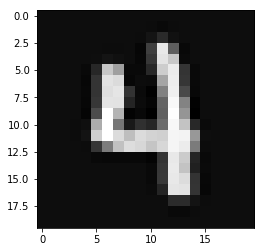

In [39]:
predict(2400, info=True)

In [40]:
counter= 0
for i in range(len(X)):
    if(predict(i)):
        counter+=1
print('Accuracy is {}'.format(counter*100.0/len(X)))

Accuracy is 100.0


# Testing

In [24]:
from sklearn.cross_validation import train_test_split
X_train, y_train, X_test, y_test= train_test_split(X, yy)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3750, 400)
(1250, 400)
(3750, 10)
(1250, 10)
